## Setup

In [1]:
source("2022_PSVD_metabolomics/2022_PSVD_metabolomics/R/00_setup.R")

In [2]:
p_load("dplyr", "ggplot2", "mice", "janitor", "POMA", "SummarizedExperiment", "EnhancedVolcano", install = FALSE)

In [3]:
metabol <- read.csv("outputs/01_metabolomics_merged.csv")
metabol <- metabol[2:ncol(metabol)]
metadata <- read.csv("outputs/01_metadata.csv")
metadata <- metadata[2:ncol(metadata)]
metabolites_mapped <- read.csv("outputs/01_metabolites_mapped.csv")

In [4]:
metadata <- metadata %>% filter(sample_id %in% metabol$sample_id)

In [5]:
metadata <- metadata %>% replace(is.na(.), 0)

In [6]:
metabolomics_obj <- PomaSummarizedExperiment(target = metadata, features = metabol[2:ncol(metabol)])

## Dimensionality reduction

Warning message in perf.mixo_plsda(plsda_res, validation = validation, folds = folds, :
“Leave-One-Out validation does not need to be repeated: 'nrepeat' is set to '1'.”



comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%
comp 4 
  |======================================================================| 100%
comp 5 
  |======================================================================| 100%


Warning message:
“The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


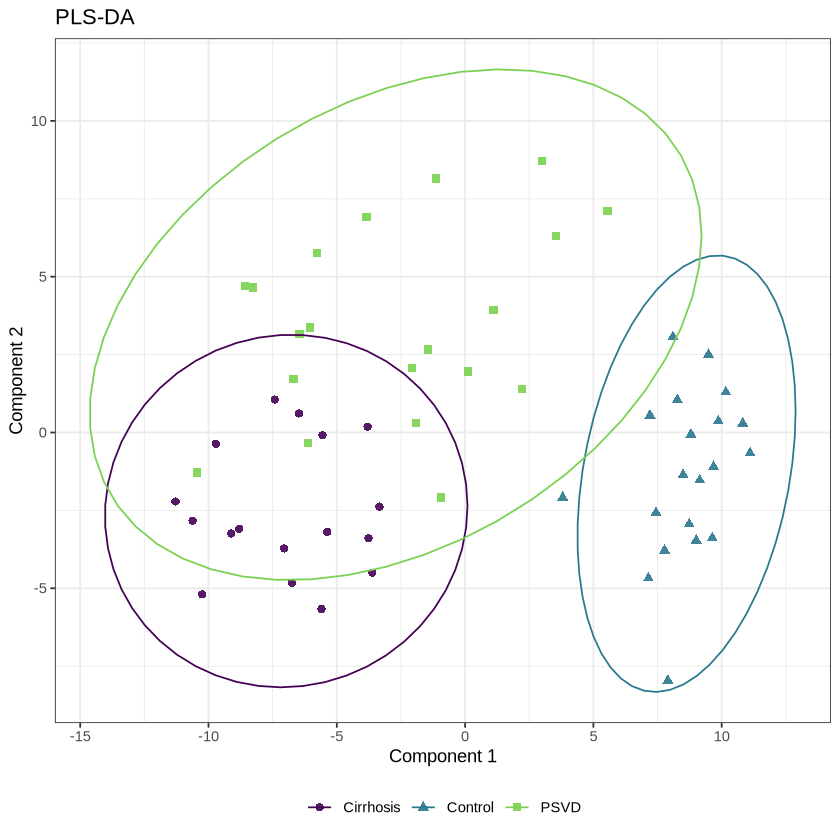

In [7]:
p_plsda <- PomaMultivariate(metabolomics_obj, method = "plsda", validation = "loo", labels = FALSE)

p_plsda <- p_plsda$scoresplot +
  ggplot2::ggtitle("PLS-DA")

  p_plsda

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_mark_ellipse()`).”


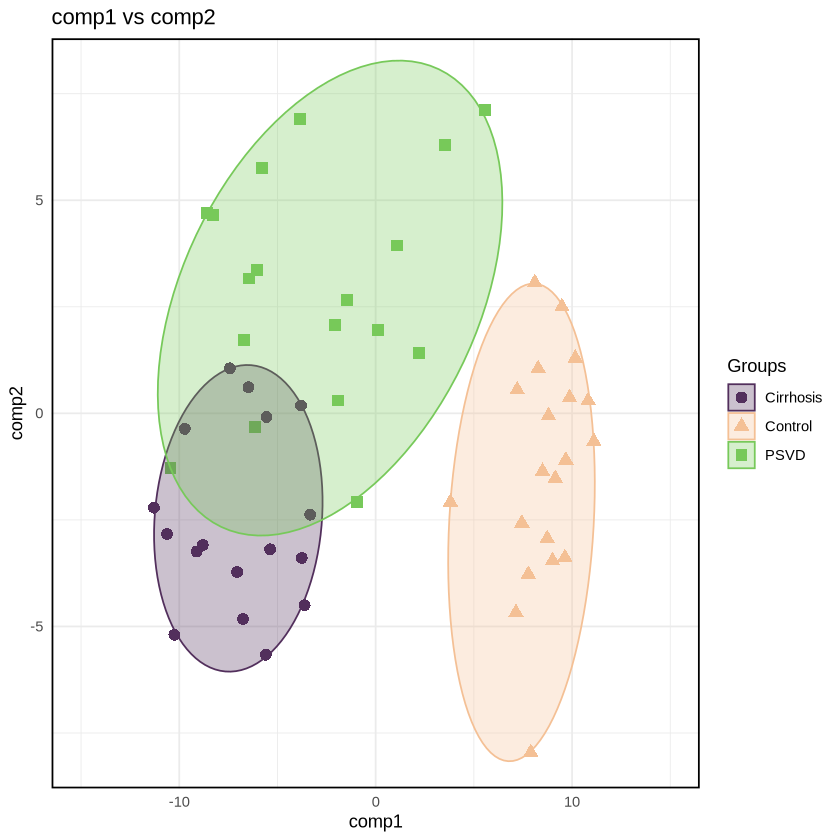

In [8]:
library(ggforce)

group_colors <- c("Cirrhosis" = "#522f5c", "PSVD" = "#77c95a", "Control" = "#F4C095")

ggplot(p_plsda$data, aes(x = comp1, y = comp2, color = Groups)) +
  geom_point(aes(shape = Groups), size = 3) +
  geom_mark_ellipse(aes(fill = Groups), expand = 0) +
  scale_color_manual(values = group_colors) +
  scale_fill_manual(values = group_colors) +
  scale_shape_manual(values = c("Cirrhosis" = 16, "PSVD" = 15, "Control" = 17)) +
  xlim(-15, 15) +
  ylim(-8, 8) +
  labs(title = "comp1 vs comp2", x = "comp1", y = "comp2") +
  theme_minimal() +
  theme(panel.border = element_rect(color = "black", fill = NA, size = 1))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_mark_ellipse()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_text()`).”


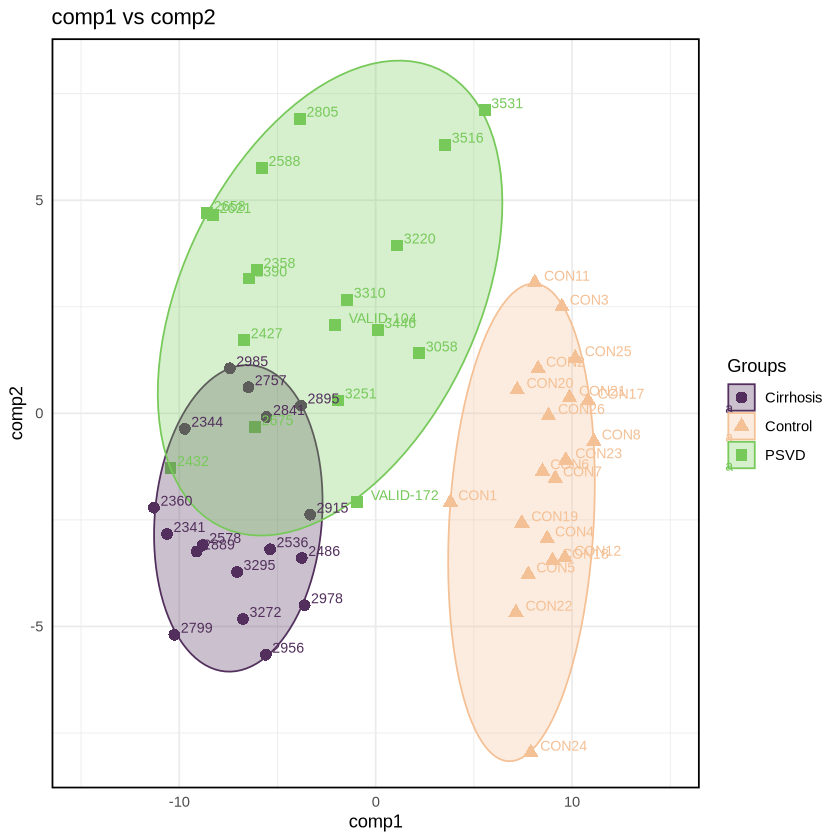

In [9]:
group_colors <- c("Cirrhosis" = "#522f5c", "PSVD" = "#77c95a", "Control" = "#F4C095")

ggplot(p_plsda$data, aes(x = comp1, y = comp2, color = Groups)) +
  geom_point(aes(shape = Groups), size = 3) +
  geom_mark_ellipse(aes(fill = Groups), expand = 0) +
  geom_text(aes(label = ID), hjust = -0.2, vjust = -0.2, size = 3) +
  scale_color_manual(values = group_colors) +
  scale_fill_manual(values = group_colors) +
  scale_shape_manual(values = c("Cirrhosis" = 16, "PSVD" = 15, "Control" = 17)) +
  xlim(-15, 15) +
  ylim(-8, 8) +
  labs(title = "comp1 vs comp2", x = "comp1", y = "comp2") +
  theme_minimal() +
  theme(panel.border = element_rect(color = "black", fill = NA, size = 1))


In [10]:
tmp_df_no_overlap <- p_plsda$data %>% filter(ID != "2432" & ID != "2427" & ID != "2675" & ID != "3251" & ID != "VALID-172")

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_mark_ellipse()`).”


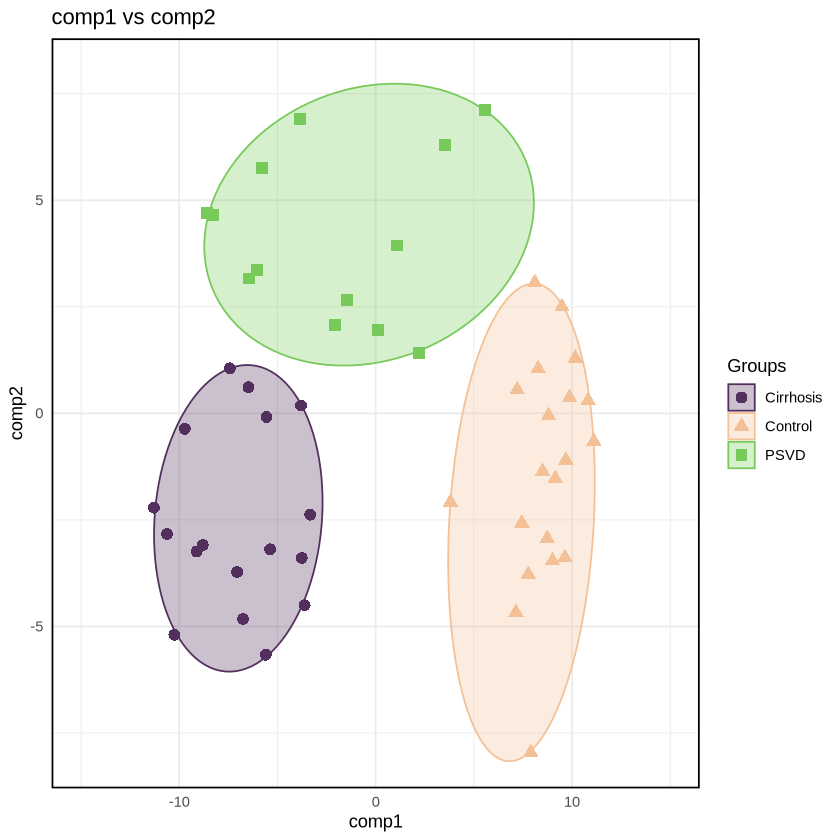

In [11]:
library(ggforce)

group_colors <- c("Cirrhosis" = "#522f5c", "PSVD" = "#77c95a", "Control" = "#F4C095")

ggplot(tmp_df_no_overlap, aes(x = comp1, y = comp2, color = Groups)) +
  geom_point(aes(shape = Groups), size = 3) +
  geom_mark_ellipse(aes(fill = Groups), expand = 0) +
  scale_color_manual(values = group_colors) +
  scale_fill_manual(values = group_colors) +
  scale_shape_manual(values = c("Cirrhosis" = 16, "PSVD" = 15, "Control" = 17)) +
  xlim(-15, 15) +
  ylim(-8, 8) +
  labs(title = "comp1 vs comp2", x = "comp1", y = "comp2") +
  theme_minimal() +
  theme(panel.border = element_rect(color = "black", fill = NA, size = 1))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


Warning message:
“The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


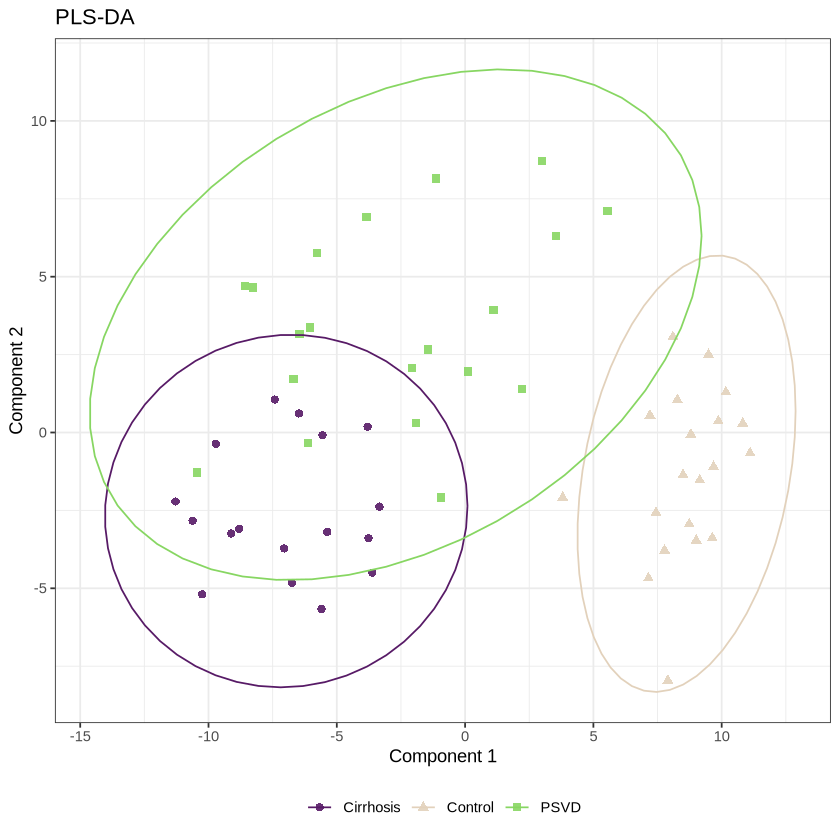

In [12]:
p_plsda + scale_color_manual(values = c("#571a66", "#e2d1bb", "#87d662"))

In [13]:
p_heatmap <- PomaCorr(metabolomics_obj, label_size = 8, coeff = 0.6)
p_heatmap$correlations

Loading required namespace: ggraph



feature1,feature2,corr,pvalue,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
HMDB0008132,HMDB0008843,0.9858258,2.485204e-44,9.776791e-40
HMDB0010382.1,HMDB0002815.1,0.9851203,9.365032e-44,1.842102e-39
HMDB0008330,HMDB0008882,0.9713161,5.405028e-36,7.087793e-32
HMDB0005361,HMDB0005369,0.9683518,7.774619e-35,7.646337e-31
HMDB0010412,HMDB0010419,0.9627317,6.474454e-33,5.094101e-29
HMDB0005368,HMDB0005372,0.9618662,1.203645e-32,7.891902e-29
HMDB0011129,HMDB0011484,0.9567143,3.670929e-31,2.063062e-27
HMDB0005370,HMDB0005373,0.9540190,1.866103e-30,9.176560e-27
HMDB0005357,HMDB0005360,0.9509853,1.039349e-29,4.543111e-26


## Differential metabolites

In [14]:
cir_cneg <- PomaLimma(metabolomics_obj, contrast  = "Cirrhosis-Control", adjust = "fdr")
psvd_cir <- PomaLimma(metabolomics_obj, contrast  = "PSVD-Cirrhosis", adjust = "fdr")
psvd_cneg <- PomaLimma(metabolomics_obj, contrast  = "PSVD-Control", adjust = "fdr")

In [15]:
psvd_cir %>% filter(adj.P.Val < 0.05)

feature,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMDB0000158,-1.3851099,0.033008123,-4.587672,2.387966e-05,0.00656756,2.5070938
HMDB0000191,-1.3994144,-0.229279207,-4.354657,5.383565e-05,0.00656756,1.7519612
HMDB0000448,0.8054524,0.007028031,4.278820,6.986766e-05,0.00656756,1.5103236
HMDB0007872,-1.2147761,-0.148939473,-3.731557,4.298003e-04,0.03030092,-0.1647530
CE.16.1.,-1.3746990,-0.159540025,-3.616972,6.188770e-04,0.03490466,-0.4985009
HMDB0000036,-0.7996115,-0.138888664,-3.468096,9.849449e-04,0.04081233,-0.9223628
LacCer.d42.2.,-0.8997489,-0.015607714,-3.458965,1.013072e-03,0.04081233,-0.9479869


In [16]:
metabolites_mapped <- read.csv("outputs/01_metabolites_mapped.csv")
psvd_cneg$feature <- gsub("\\..*","",psvd_cneg$feature)
cir_cneg$feature <- gsub("\\..*","", cir_cneg$feature)
psvd_cir$feature <- gsub("\\..*","",psvd_cir$feature)

In [17]:
indices_psvdcneg <- match(psvd_cneg$feature, metabolites_mapped$HMDB)
psvd_cneg$feature <- ifelse(is.na(indices_psvdcneg), psvd_cneg$feature, metabolites_mapped$name_corrected[indices_psvdcneg])

indices_circneg <- match(cir_cneg$feature, metabolites_mapped$HMDB)
cir_cneg$feature <- ifelse(is.na(indices_circneg), cir_cneg$feature, metabolites_mapped$name_corrected[indices_circneg])

indices_psvdcir <- match(psvd_cir$feature, metabolites_mapped$HMDB)
psvd_cir$feature <- ifelse(is.na(indices_psvdcir), psvd_cir$feature, metabolites_mapped$name_corrected[indices_psvdcir])

Warning message:
“ggrepel: 94 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


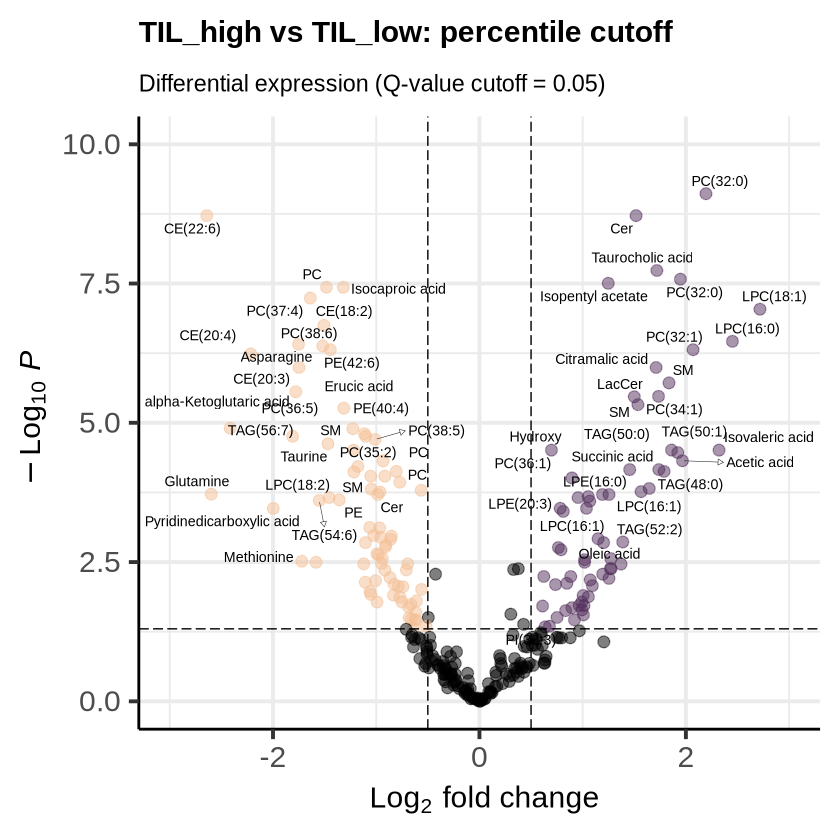

In [18]:
keyvals <- rep("#000000", nrow(cir_cneg))
names(keyvals) <- rep("NS", nrow(cir_cneg))

keyvals[which(cir_cneg$logFC >= 0.5 &
                cir_cneg$`adj.P.Val` < 0.05)] <- "#522f5c"
names(keyvals)[which(cir_cneg$logFC >= 0.5 &
                       cir_cneg$`adj.P.Val` < 0.05)] <- "Cirrhosis"
keyvals[which(cir_cneg$logFC <= -0.5 &
                cir_cneg$`adj.P.Val` <= 0.05)] <- "#F4C095"
names(keyvals)[which(cir_cneg$logFC <= -0.5 &
                       cir_cneg$`adj.P.Val` <= 0.05)] <- "Non-diseased"
     


EnhancedVolcano(cir_cneg,
                lab = cir_cneg$feature,
#                selectLab = rownames(ccl4_cpos_cneg)[which(names(keyvals_ccl4) %in% c('high', 'low'))],
                colCustom = keyvals,
                x = "logFC",
#                xlim = c(-10, 10),
                y = "adj.P.Val",
                ylim = c(0, 10),
                xlim = c(-3, 3),
                title = expression(bold("TIL_high vs TIL_low: percentile cutoff")),
                subtitle = "Differential expression (Q-value cutoff = 0.05)",
                caption = NULL,
                pCutoff = 0.05,
                FCcutoff = 0.5,
                pointSize = 3.0,
                labSize = 3.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15,
                max.overlaps = 12, min.segment.length = 1
               ) + theme(legend.position = "none")

In [24]:
keyvals <- rep("#000000", nrow(psvd_cir))
names(keyvals) <- rep("NS", nrow(psvd_cir))

keyvals[which(psvd_cir$logFC >= 0.5 &
                psvd_cir$`adj.P.Val` < 0.05)] <- "#77c95a"
names(keyvals)[which(psvd_cir$logFC >= 0.5 &
                       psvd_cir$`adj.P.Val` < 0.05)] <- "PSVD"
keyvals[which(psvd_cir$logFC <= -0.5 &
                psvd_cir$`adj.P.Val` <= 0.01)] <- "#522f5c"
names(keyvals)[which(psvd_cir$logFC <= -0.5 &
                       psvd_cir$`adj.P.Val` <= 0.05)] <- "Cirrhosis"
     


psvd_cir_volcano <- EnhancedVolcano(psvd_cir,
                lab = psvd_cir$feature,
#                selectLab = rownames(ccl4_cpos_cneg)[which(names(keyvals_ccl4) %in% c('high', 'low'))],
                colCustom = keyvals,
                x = "logFC",
#                xlim = c(-10, 10),
                y = "adj.P.Val",
                ylim = c(0, 2.5),
                xlim = c(-2.5, 2),
                title = expression(bold("PSVD vs cirrhosis")),
                subtitle = "P(adjusted) cutoff < 0.05, n = 7",
                caption = NULL,
                pCutoff = 0.05,
                FCcutoff = 0.5,
                pointSize = 3.0,
                labSize = 3.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15,
                max.overlaps = 12
               ) + theme(legend.position = "none")

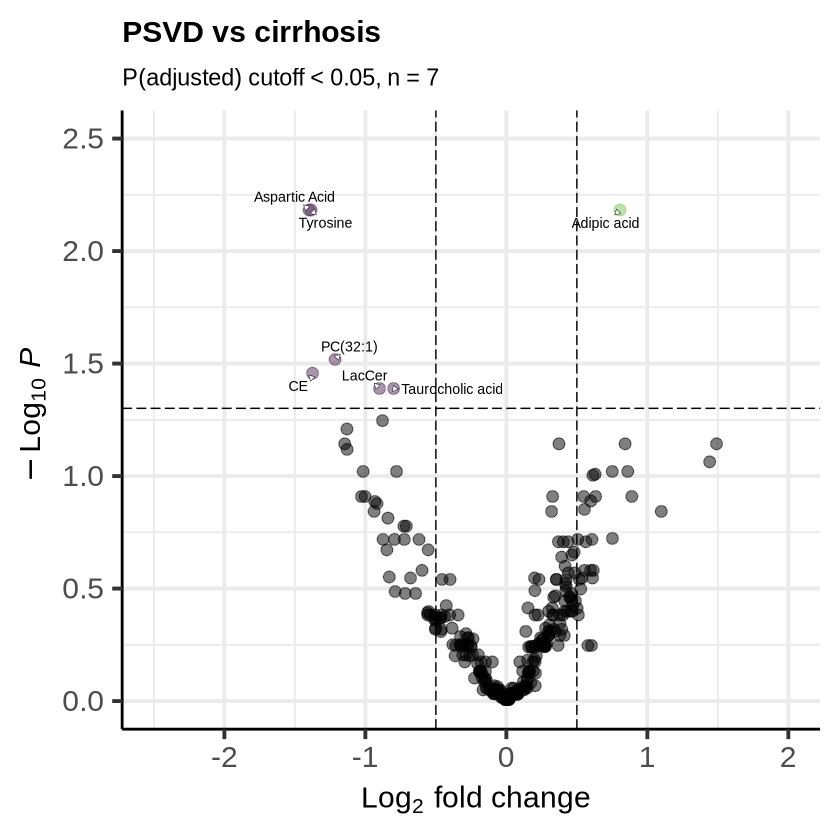

In [25]:
psvd_cir_volcano

Warning message:
“ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


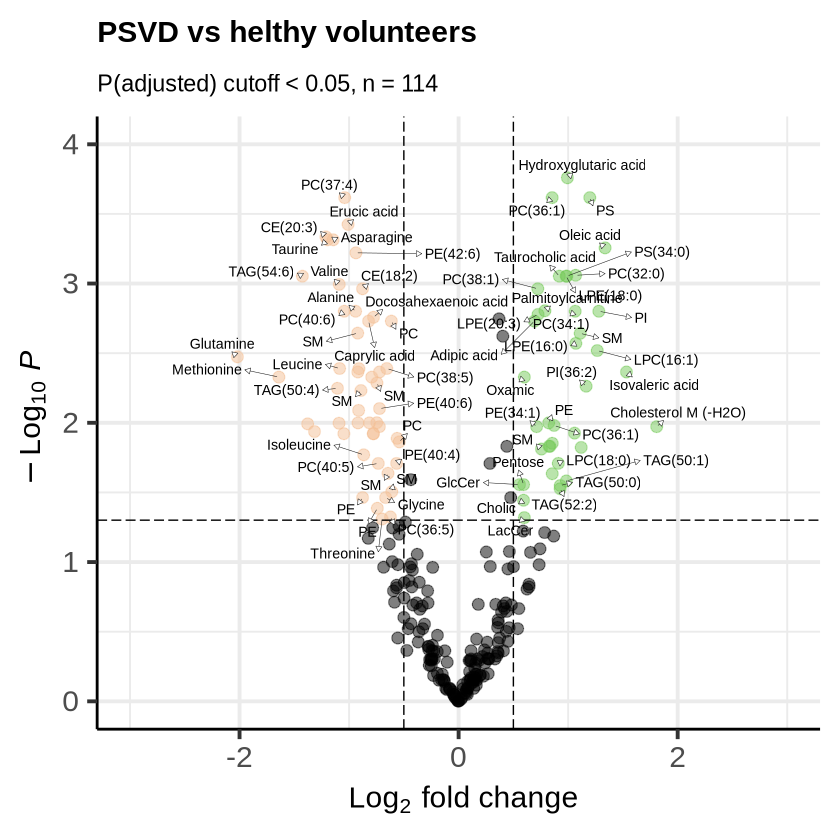

In [27]:
keyvals <- rep("#000000", nrow(psvd_cneg))
names(keyvals) <- rep("NS", nrow(psvd_cneg))

keyvals[which(psvd_cneg$logFC >= 0.5 &
                psvd_cneg$`adj.P.Val` < 0.05)] <- "#77c95a"
names(keyvals)[which(psvd_cneg$logFC >= 0.5 &
                       psvd_cneg$`adj.P.Val` < 0.05)] <- "PSVD"
keyvals[which(psvd_cneg$logFC <= -0.5 &
                psvd_cneg$`adj.P.Val` <= 0.05)] <- "#F4C095"
names(keyvals)[which(psvd_cneg$logFC <= -0.5 &
                       psvd_cneg$`adj.P.Val` <= 0.05)] <- "Cneg"
     


psvd_cneg_volcano <- EnhancedVolcano(psvd_cneg,
                lab = psvd_cneg$feature,
#                selectLab = rownames(ccl4_cpos_cneg)[which(names(keyvals_ccl4) %in% c('high', 'low'))],
                colCustom = keyvals,
                x = "logFC",
#                xlim = c(-10, 10),
                y = "adj.P.Val",
                ylim = c(0, 4),
                xlim = c(-3, 3),
                title = expression(bold("PSVD vs helthy volunteers")),
                subtitle = "P(adjusted) cutoff < 0.05, n = 114",
                caption = NULL,
                pCutoff = 0.05,
                FCcutoff = 0.5,
                pointSize = 3.0,
                labSize = 3.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15,
                max.overlaps = 12
               ) + theme(legend.position = "none")

psvd_cneg_volcano

## Subgroup

In [5]:
metabol <- read.csv("outputs/01_metabolomics_merged.csv")
metabol <- metabol[2:ncol(metabol)]
metadata <- read.csv("outputs/01_metadata.csv")
metadata <- metadata[2:ncol(metadata)]
metabolites_mapped <- read.csv("outputs/01_metabolites_mapped.csv")

In [6]:
meta_sg <- metadata %>% filter(sample_description == "PSVD")

In [7]:
meta_sg <- meta_sg %>% mutate(psvd_group = case_when(
    sample_id %in% c("2432", "2675", "2427", "3251", "VALID-172") ~ "cirr_like",
    TRUE ~ "psvd"
))

In [8]:
meta_sg$psvd_group <- as.factor(meta_sg$psvd_group)

In [9]:
metabol_sg <- metabol %>% filter(sample_id %in% meta_sg$sample_id)

In [10]:
meta_sg <- meta_sg %>% relocate(sample_id, psvd_group)

In [11]:
metabolomics_obj_sg <- PomaSummarizedExperiment(target = meta_sg, features = metabol_sg[2:ncol(metabol_sg)])

In [12]:
psvd_psvdcir <- PomaLimma(metabolomics_obj_sg, contrast  = "cirr_like-psvd", adjust = "fdr")

In [13]:
psvd_psvdcir$feature <- gsub("\\..*","", psvd_psvdcir$feature)

In [14]:
indices_psvd_psvdcir <- match(psvd_psvdcir$feature, metabolites_mapped$HMDB)
psvd_psvdcir$feature <- ifelse(is.na(indices_psvd_psvdcir), psvd_psvdcir$feature, metabolites_mapped$name_corrected[indices_psvd_psvdcir])

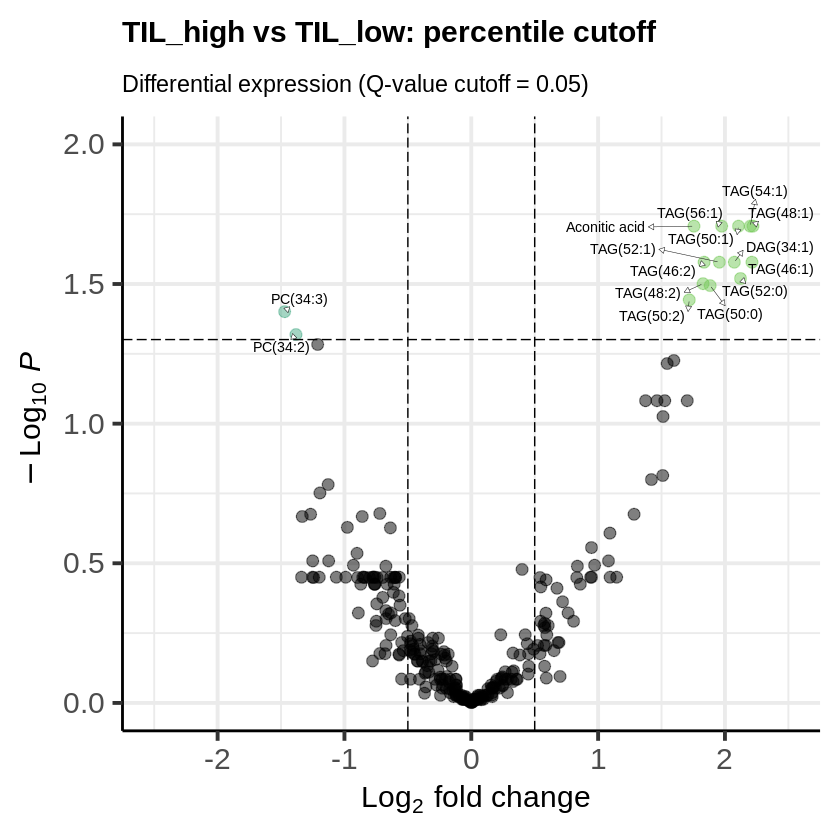

In [15]:
keyvals <- rep("#000000", nrow(psvd_psvdcir))
names(keyvals) <- rep("NS", nrow(psvd_psvdcir))

keyvals[which(psvd_psvdcir$logFC >= 0.5 &
                psvd_psvdcir$`adj.P.Val` < 0.05)] <- "#77c95a"
names(keyvals)[which(psvd_psvdcir$logFC >= 0.5 &
                       psvd_psvdcir$`adj.P.Val` < 0.05)] <- "PSVD"
keyvals[which(psvd_psvdcir$logFC <= -0.5 &
                psvd_psvdcir$`adj.P.Val` <= 0.05)] <- "#4aac88"
names(keyvals)[which(psvd_psvdcir$logFC <= -0.5 &
                       psvd_psvdcir$`adj.P.Val` <= 0.05)] <- "Cneg"
     


EnhancedVolcano(psvd_psvdcir,
                lab = psvd_psvdcir$feature,
#                selectLab = rownames(ccl4_cpos_cneg)[which(names(keyvals_ccl4) %in% c('high', 'low'))],
                colCustom = keyvals,
                x = "logFC",
#                xlim = c(-10, 10),
                y = "adj.P.Val",
                ylim = c(0, 2),
                xlim = c(-2.5, 2.5),
                title = expression(bold("TIL_high vs TIL_low: percentile cutoff")),
                subtitle = "Differential expression (Q-value cutoff = 0.05)",
                caption = NULL,
                pCutoff = 0.05,
                FCcutoff = 0.5,
                pointSize = 3.0,
                labSize = 3.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15#
               ) + theme(legend.position = "none")

In [18]:
psvd_sg_sig <- psvd_psvdcir %>% filter(adj.P.Val < 0.05) %>% arrange(logFC)

In [23]:
meta_sg_pca <- meta_sg %>% tibble::column_to_rownames("sample_id") %>% select(-c(psvd_group, sample_description, group_123, group_gen, drug_induced))

In [25]:
pca_res <- prcomp(meta_sg_pca, scale=TRUE)

In [29]:
pca_res$x %>% as.data.frame

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2358,1.04502768,-1.82215821,1.2545280,1.6243398,-0.7495452,0.69931102,-1.67498773,-0.48662068,-0.236351735,0.9552206,0.31815426,0.13612585,0.87953859,-0.18451732,-0.25463407,0.03004933,-0.644501532,0.50036105,-0.177553449,-2.476511e-16
2390,1.90873394,3.76309581,1.4620606,0.5472031,0.2222754,0.72215867,-0.60024871,2.15596740,-1.064175080,0.1064941,0.04624430,-0.17637432,-1.10438516,-0.61380639,0.19668140,-0.10134170,0.114148744,0.31329909,-0.155006489,-1.368756e-15
2427,0.95910891,5.92387518,0.4415683,0.2378109,1.4253058,0.53868059,0.13383041,-0.92908080,1.225470753,0.2830858,-0.38300954,0.52632910,0.62254769,0.09761696,-0.54142882,-0.07259407,-0.164913210,-0.20122547,0.166783716,-6.757970e-16
2432,-2.17193482,-0.48689652,-1.9150453,-2.3801806,-0.6522986,1.19174311,-2.01522494,1.64424887,0.905586568,0.3336143,0.09442356,0.22753722,0.63188889,-0.11138518,-0.21394009,0.36317318,0.549930821,0.17398894,0.122533921,-3.022395e-16
2588,3.36088693,-2.28455867,1.1011632,-0.8330763,-0.6177072,0.44563176,-0.62541331,0.39388777,-1.047732032,-1.1430549,-0.28411724,-0.40121510,-0.28328566,-0.02219570,-1.14187829,-0.11460944,-0.080354922,-0.38467034,0.185061611,-9.374649e-17
2621,-1.86870711,1.04612162,1.9796563,-0.1597733,0.2953148,-1.52979460,0.28690251,0.42546883,-1.103292843,0.3933630,1.92440357,-0.27443304,0.19492043,1.07733811,-0.11893671,0.42808463,0.080106844,-0.14628498,-0.005791333,-2.539606e-16
2658,-2.99950508,-2.48841065,0.8706420,2.1751059,2.9789440,0.11408945,-0.60835432,0.22467202,1.263569209,-0.9948242,0.53289050,1.05240712,-0.62695687,-0.29599673,-0.10834937,-0.03937060,0.028019097,-0.11008789,-0.057827393,4.245120e-16
2675,4.84923968,-0.53637844,-0.9845299,-0.9264918,1.0821234,0.96237265,-0.91024720,-2.41408165,0.821467285,-0.1877385,0.75233092,-0.67371767,-0.52162333,0.39431108,0.39200720,0.08999247,0.311418739,0.15610742,-0.079080044,-7.534395e-16
2805,2.59593413,-1.88623452,0.7750347,0.5980818,0.1937285,-0.72338531,0.89184891,0.64925282,-0.123051036,1.1145876,-0.17273968,0.79563802,0.01227745,0.38199083,0.44916594,-0.57944442,0.169716220,0.21797235,0.503104668,6.476763e-17


In [31]:
var_explained <- pca_res$sdev^2/sum(pca_res$sdev^2)
var_explained[1:5]

[1] 0.22147324 0.15497417 0.12480927 0.09405082 0.07977919

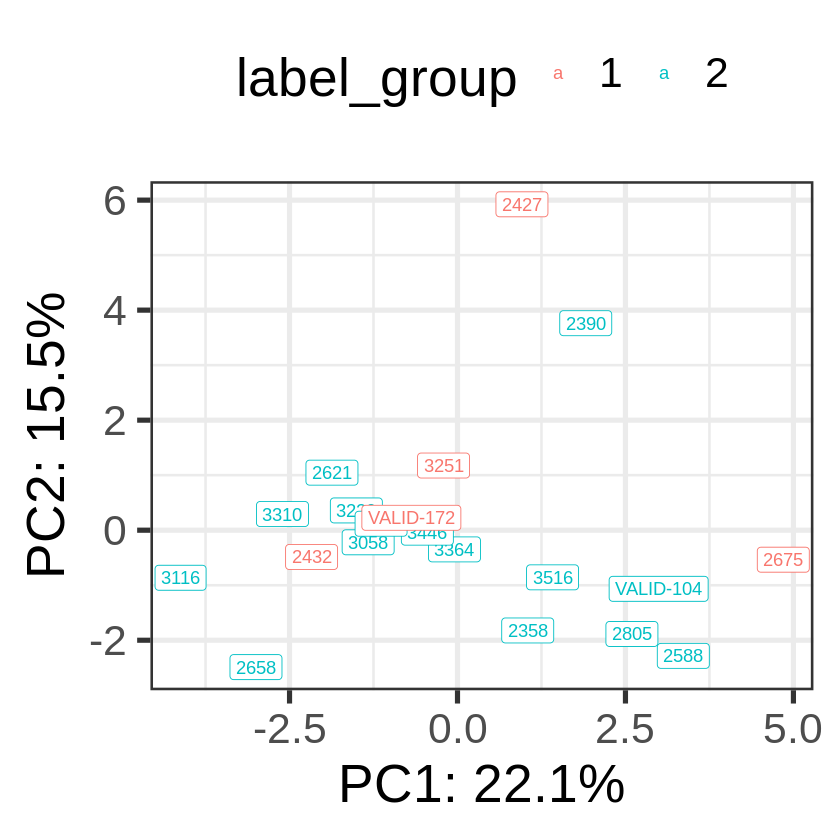

In [57]:
pca_res$x %>% 
  as.data.frame %>%
  tibble::rownames_to_column("sample") %>%
  mutate(label_group = case_when(
     sample %in% c("2432", "2675", "2427", "3251", "VALID-172") ~ "1",
     TRUE ~ "2"
  )) %>%
  ggplot(aes(x=PC1,y=PC2, label = sample, color = label_group)) +
  theme_bw(base_size=32) + geom_label() +
  labs(x=paste0("PC1: ",round(var_explained[1]*100,1),"%"),
       y=paste0("PC2: ",round(var_explained[2]*100,1),"%")) +
  theme(legend.position="top")

## Outputs

In [56]:
cir_up <- subset(cir_cneg, adj.P.Val < 0.05)
cir_down <- subset(cir_up, logFC < 0)
cir_up <- subset(cir_up, logFC > 0)


psvd_up <- subset(psvd_cneg, adj.P.Val < 0.05)
psvd_down <- subset(psvd_up, logFC < 0)
psvd_up <- subset(psvd_up, logFC > 0)

In [57]:
write.csv(cir_up, "outputs/02_cir_up")
write.csv(cir_down, "outputs/02_cir_down")

write.csv(psvd_up, "outputs/02_psvd_up")
write.csv(psvd_down, "outputs/02_psvd_down")

write.csv(cir_cneg, "outputs/02_cir_cneg")
write.csv(psvd_cir, "outputs/02_psvd_cir")
write.csv(psvd_cneg, "outputs/02_psvd_cneg")

In [19]:
write.csv(psvd_sg_sig, "outputs/02_psvd_sg.csv")

In [28]:
ggsave(file = "outputs/02_psvd_cir_volcano.svg", plot = psvd_cir_volcano, width = 12, height = 12, dpi = 300)
ggsave(file = "outputs/02_psvd_cneg_volcano.svg", plot = psvd_cneg_volcano, width = 12, height = 12, dpi = 300)

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
